# Generating An Imbalanced Dataset (3 classes)

In [1]:
import sklearn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define an imbalanced dataset 3 classes
# 2 informative features
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2,
    n_clusters_per_class=1, weights=[0.01,0.005, 0.985], flip_y=0, n_classes=3,
    n_redundant=0, n_repeated=0,class_sep=2.0,random_state=0)

In [3]:
# convert to pandas Dataframe
imb_df = pd.DataFrame(X, columns = ['X1','X2'])
imb_df['y'] = y

# Examine Dataset

In [4]:
imb_df.head()

,X1,X2,y
0,1.600872,-2.090904,2
1,1.940958,-2.363784,2
2,2.632733,-0.364190,2
3,2.448899,-1.440345,2
4,1.717464,-2.421016,2


In [5]:
imb_df['y'].value_counts()

2    1970
0      20
1      10
Name: y, dtype: int64

In [6]:
imb_df.describe()

,X1,X2,y
count,2000.000000,2000.000000,2000.000000
mean,1.981437,-1.906402,1.975000
std,0.606151,0.923299,0.210706
min,-2.699139,-5.592467,0.000000
25%,1.697381,-2.511569,2.000000
50%,2.010777,-1.949221,2.000000
75%,2.329309,-1.388646,2.000000
max,3.786427,3.342286,2.000000


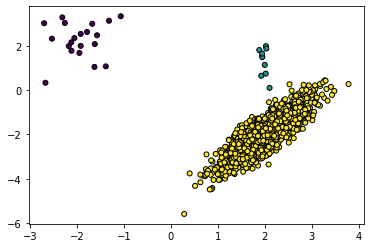

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [8]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

Create Train Test Split

In [9]:
msk = np.random.rand(len(imb_df)) < 0.8

train = imb_df[msk]
test = imb_df[~msk]

y_true = test.pop('y')
y_train = train.pop('y')

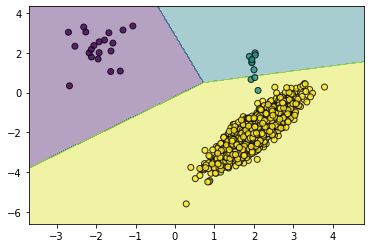

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train, y_train)

ax = plt.axes()
plot_decision_function(X,y, clf,ax)

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, train, y_train, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.9987341772151899
min: 0.9936708860759493
max: 1.0


C:\Users\mmitk\Anaconda3\envs\imbenv\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [12]:
from sklearn.metrics import balanced_accuracy_score

y_pred = clf.predict(test)
b_score = balanced_accuracy_score(y_true, y_pred)
print('Balanced Accuracy Score: {}'.format(b_score))

Balanced Accuracy Score: 0.8333333333333334


In [13]:
from sklearn.metrics import balanced_accuracy_score

# Random Oversampling

In [14]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

In [15]:
pipeline = make_pipeline(RandomOverSampler(random_state=0),LogisticRegression(random_state=0))

TypeError: '(slice(None, None, None), 0)' is an invalid key

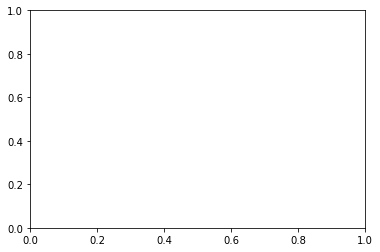

In [16]:
ax2 = plt.axes()
pipeline.fit(train, y_train)
plot_decision_function(train,y_train, pipeline, ax2)

In [ ]:
scores = cross_val_score(pipeline, train,y_train, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_pred = clf.predict(test['y'])
b_score = balanced_accuracy_score(test['y'], y_pred)
print('Balanced Accuracy Score: {}'.format(b_score))

# ADASYN

In [ ]:

clf_ad = make_pipeline(ADASYN(random_state=0), LogisticRegression())

ax3 = plt.axes()
clf_ad.fit(X,y)
plot_decision_function(X, y, clf_ad, ax3)

In [ ]:
scores = cross_val_score(clf_ad, train, y_train, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

# SMOTE

In [ ]:
pipe_smote = make_pipeline(SMOTE(random_state=0),LogisticRegression(random_state=0))

ax4 = plt.axes()
pipe_smote.fit(train,y_train)
plot_decision_function(train,y_train, pipe_smote, ax4)

In [ ]:
scores = cross_val_score(pipe_smote, train,y_train, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))